In [61]:
words = sc.textFile('file:///var/log/ambari-agent/ambari-agent.log') \
 .flatMap(lambda x: x.lower().split(' ')) \
 .filter(lambda x: x.isalpha()) \
 .map(lambda x: (x, 1)) \
 .reduceByKey(add)

words.take(5)

[(u'envvars', 78), (u'all', 159), (u'being', 2), (u'when', 546), (u'over', 78)]

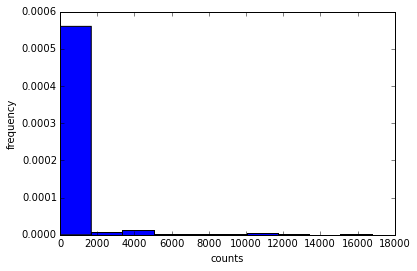

In [58]:
# Graph the distribution of word counts
import matplotlib.pyplot as plt
plt.xlabel('counts')
plt.ylabel('frequency')

counts = [x[1] for x in words.collect()]

n, bins, patches = plt.hist(counts,10, normed=True)

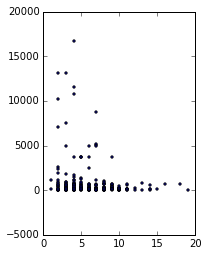

In [60]:
# Is there a relationship between word length and frequency?
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax1 = fig.add_subplot(121)

x=[]
y=[]

for word in words.collect():
  y.append(word[1]) # frequency
  x.append(len(word[0])) # word length

ax1.scatter(x,y,s=5)